In [6]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import *
import os

In [38]:
directory = os.path.join('data')
training_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode="binary",
    image_size=(256,256),
    validation_split=0.2,
    subset='training',
    shuffle=False
)
validation_dataset =  tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode="binary",
    image_size=(256,256),
    subset='validation',
    validation_split=0.5,
    shuffle=False
)


Found 161 files belonging to 2 classes.
Using 129 files for training.
Found 161 files belonging to 2 classes.
Using 80 files for validation.


In [39]:
# base model for transfer learning 
base_model = tf.keras.applications.MobileNetV2(input_shape=(256, 256, 3),
                                                include_top=False,
                                                weights='imagenet')

In [40]:
# try outs

In [41]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout

tf.random.set_seed(42)


In [42]:
for layer in base_model.layers:
    layer.trainable = False

In [43]:
model = tf.keras.Sequential([
   
    base_model,  
    tf.keras.layers.Rescaling(1./255, input_shape=(256, 256, 3)),  # Normalize pixel values
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),  # Flatten the output of the convolutional layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])



In [44]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_dataset, validation_data=validation_dataset, epochs=15)


Epoch 1/15
5/5 [==============================] - 10s 1s/step - loss: 0.7323 - accuracy: 0.4419 - val_loss: 0.7708 - val_accuracy: 0.0000e+00
Epoch 2/15
5/5 [==============================] - 4s 857ms/step - loss: 0.6422 - accuracy: 0.6202 - val_loss: 0.7144 - val_accuracy: 0.0000e+00
Epoch 3/15
5/5 [==============================] - 4s 870ms/step - loss: 0.6162 - accuracy: 0.7597 - val_loss: 0.6776 - val_accuracy: 0.9000
Epoch 4/15
5/5 [==============================] - 4s 843ms/step - loss: 0.5727 - accuracy: 0.9302 - val_loss: 0.6470 - val_accuracy: 1.0000
Epoch 5/15
5/5 [==============================] - 4s 807ms/step - loss: 0.5130 - accuracy: 0.9380 - val_loss: 0.6063 - val_accuracy: 1.0000
Epoch 6/15
5/5 [==============================] - 4s 831ms/step - loss: 0.4263 - accuracy: 0.9845 - val_loss: 0.5380 - val_accuracy: 1.0000
Epoch 7/15
5/5 [==============================] - 4s 844ms/step - loss: 0.3496 - accuracy: 0.9922 - val_loss: 0.4520 - val_accuracy: 1.0000
Epoch 8/15
5/5

1/1 [==============================] - 1s 705ms/step


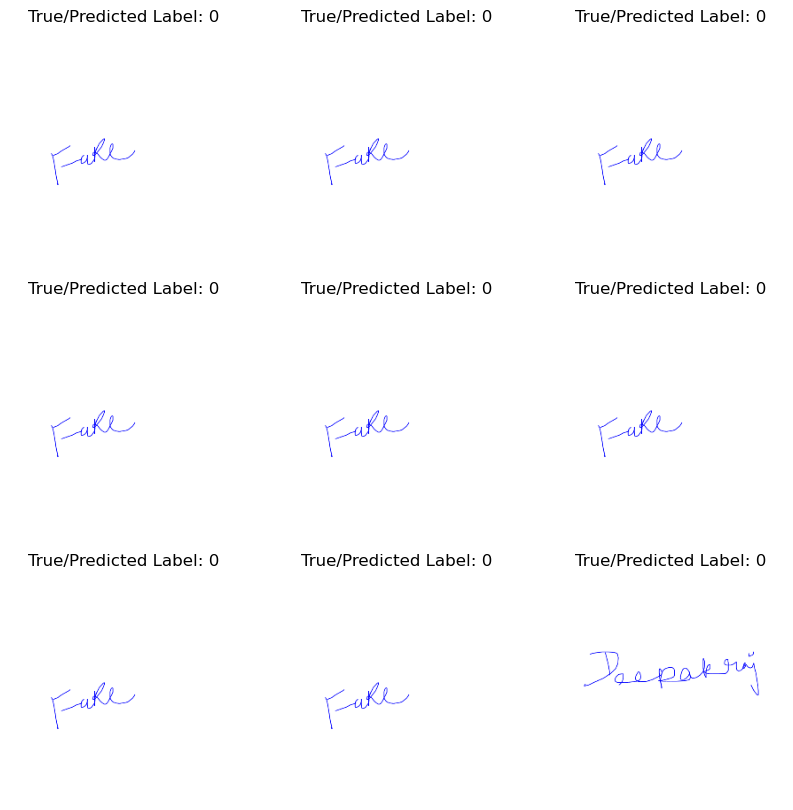

1/1 [==============================] - 1s 603ms/step


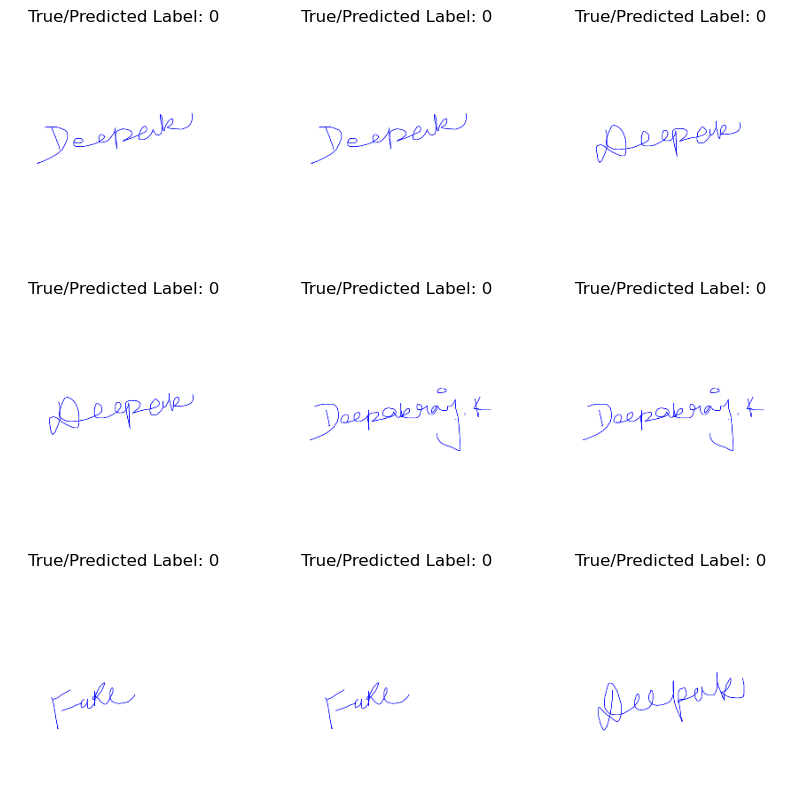

1/1 [==============================] - 1s 608ms/step


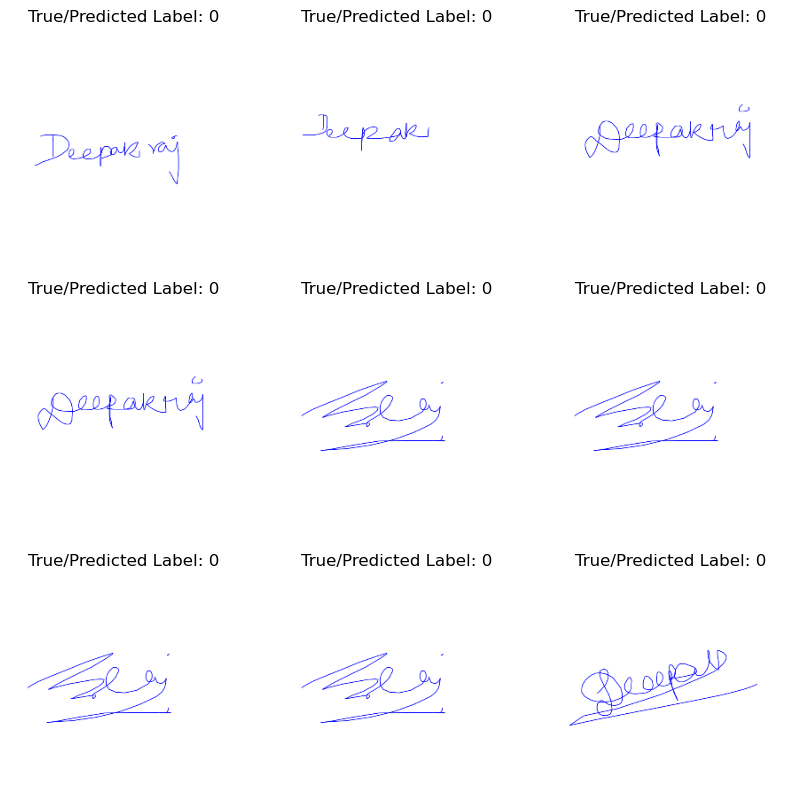

1/1 [==============================] - 1s 605ms/step


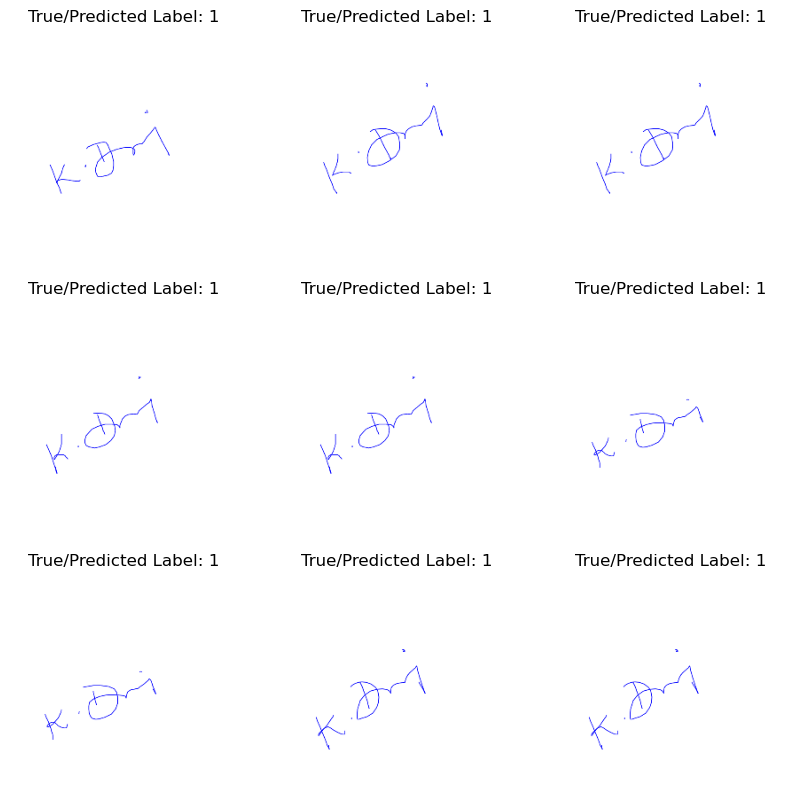

1/1 [==============================] - 0s 57ms/step


InvalidArgumentError: {{function_node __wrapped__StridedSlice_device_/job:localhost/replica:0/task:0/device:CPU:0}} slice index 1 of dimension 0 out of bounds. [Op:StridedSlice] name: strided_slice/

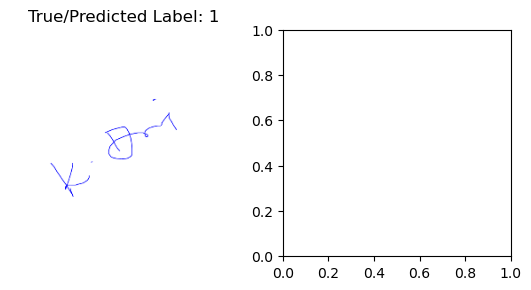

In [61]:
for images, labels in training_dataset:  # Take one batch of data
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    # Plot images with labels
    plt.figure(figsize=(10, 10))
    for i in range(9):  # Plot first 9 images
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        if labels[i].numpy() == predicted_labels[i]:
            plt.title("True/Predicted Label: {}".format(int(labels[i])))
        else:
            plt.title("True Label: {}\nPredicted Label: {}".format(int(labels[i]), predicted_labels[i]))
        plt.axis("off")
    plt.show()

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 8, 8, 1280)       2257984   
 ional)                                                          
                                                                 
 rescaling_4 (Rescaling)     (None, 8, 8, 1280)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 32)          368672    
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 3, 3, 32)         0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 288)               0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [50]:
evaluation_result = model.evaluate(training_dataset)

# Print the evaluation result
print("Evaluation Loss:", evaluation_result[0])
print("Evaluation Accuracy:", evaluation_result[1])

5/5 [==============================] - 3s 471ms/step - loss: 0.0092 - accuracy: 1.0000
Evaluation Loss: 0.009194190613925457
Evaluation Accuracy: 1.0


In [51]:
model.save('./models/model1.h5')

In [65]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

# Load the saved model
model = tf.keras.models.load_model('./models/model1.h5')

# Preprocess the new image
img_path = 'org.png'
img = image.load_img(img_path, target_size=(256, 256))  # Assuming your model expects 650x650 images
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array /= 255.  # Normalize pixel values

# Perform prediction
predictions = model.predict(img_array)

print(predictions)


1/1 [==============================] - 1s 1s/step
[[0.8550477  0.14495225]]
